<a href="https://colab.research.google.com/github/ignadr/ML-Algorithms-Practice/blob/main/book_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'book-recommendation-dataset' dataset.
Path to dataset files: /kaggle/input/book-recommendation-dataset


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')
ratings = pd.read_csv('/kaggle/input/book-recommendation-dataset/Ratings.csv')
users = pd.read_csv('/kaggle/input/book-recommendation-dataset/Users.csv')

/tmp/ipython-input-409789061.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


## Impute missing values

In [6]:
# See missing book author
books.loc[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [7]:
books.loc[books['ISBN'] == '0751352497', 'Book-Author'] = 'Dorling Kindersley'

In [8]:
# I google searched the author for book ISBN 9627982032, which is Larissa Anne Downes (editor)
# https://www.abebooks.com/9789627982074/Credit-Suisse-Guide-Managing-Personal-9627982075/plp
books.loc[books['ISBN'] == '9627982032', 'Book-Author'] = 'Larissa Anne Downes'

In [9]:
books.loc[(books['ISBN'] == '0751352497') | (books['ISBN'] == '9627982032')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,Dorling Kindersley,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,Larissa Anne Downes,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [10]:
# See missing publisher
books.loc[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [11]:
# The publisher for Tyrant Moon is "NovelBooks, Incorporated" from google search.
# Let's see if there is a common name for "NovelBooks, Incorporated"
books.loc[books['Publisher'] == "Novelbooks"].head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...,http://images.amazon.com/images/P/1931696934.0...
127002,1591051363,Beyond Those Distant Stars,John B. Rosenman,2003,Novelbooks,http://images.amazon.com/images/P/1591051363.0...,http://images.amazon.com/images/P/1591051363.0...,http://images.amazon.com/images/P/1591051363.0...
127005,159105236X,The Starry Child,Lynn Hanna,2003,Novelbooks,http://images.amazon.com/images/P/159105236X.0...,http://images.amazon.com/images/P/159105236X.0...,http://images.amazon.com/images/P/159105236X.0...


In [12]:
# Impute Tyrant Moon's publisher with Novelbooks
books.loc[books['ISBN'] == '193169656X', 'Publisher'] = 'Novelbooks'

In [13]:
# The publisher for Finders Keepers is also Novelbooks
books.loc[books['ISBN'] == '1931696993', 'Publisher'] = 'Novelbooks'

In [14]:
books.loc[(books['ISBN'] == '193169656X') | (books['ISBN'] == '1931696993')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,Novelbooks,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,Novelbooks,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [15]:
# See missing image url L
books.loc[books['Image-URL-L'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [16]:
# I will just impute each of them with its own 'Image-URL-M'
missing_url_l_rows = books['Image-URL-L'].isna()
books.loc[missing_url_l_rows, 'Image-URL-L'] = books.loc[missing_url_l_rows, 'Image-URL-M']

In [17]:
# Check the previously missing image url L
books.loc[(books['ISBN'] == '078946697X') | (books['ISBN'] == '2070426769') | (books['ISBN'] == '0789466953')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [18]:
books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [19]:
users.isna().sum()

,0
User-ID,0
Location,0
Age,110762


In [20]:
ratings.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [21]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## EDA

In [23]:
# Merge books and ratings by ISBN
books_with_ratings = books.merge(ratings, on='ISBN')
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

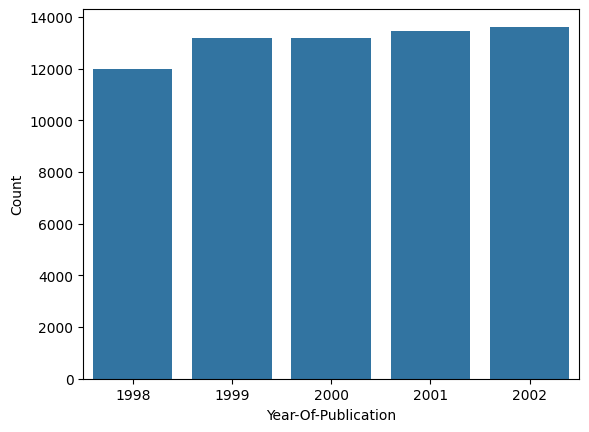

In [24]:
top_5_years_with_most_publication = books.groupby('Year-Of-Publication')['Book-Title'].nunique().sort_values(ascending=False).head(5).reset_index()
top_5_years_with_most_publication.columns = ['Year-Of-Publication', 'Count']

sns.barplot(top_5_years_with_most_publication, x='Year-Of-Publication', y='Count')
# reset_index() convert the series caused by the groupby() back to a standard dataframe, which can be read by sns.barplot()

2002 is the year with the most books published

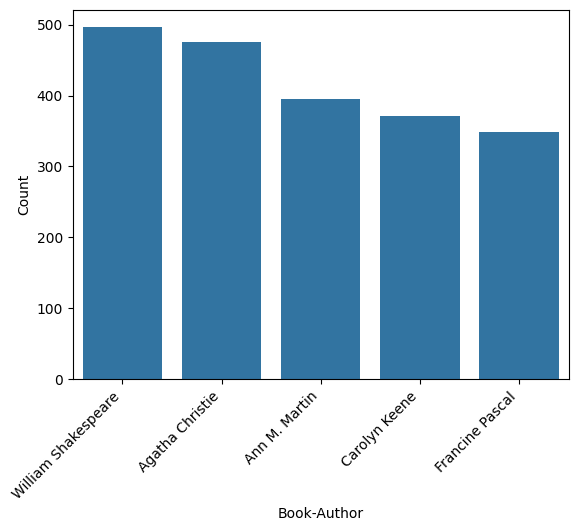

In [25]:
top_5_authors_with_most_books = books.groupby('Book-Author')['Book-Title'].nunique().sort_values(ascending=False).head(5).reset_index()
top_5_authors_with_most_books.columns = ["Book-Author", 'Count']

sns.barplot(top_5_authors_with_most_books, x="Book-Author", y='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

William Shakespeare has the most books in the dataset

<Axes: xlabel='Book-Rating', ylabel='count'>

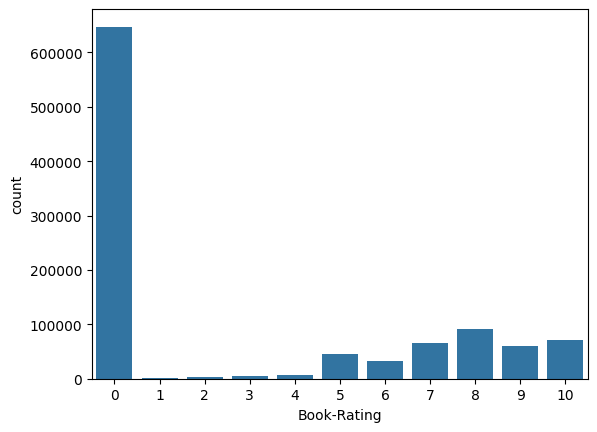

In [26]:
sns.countplot(books_with_ratings, x='Book-Rating')

Most users do not rate books. Therefore, we can try finding users who rate more than a certain number of books to be eligible to be put into the equation.

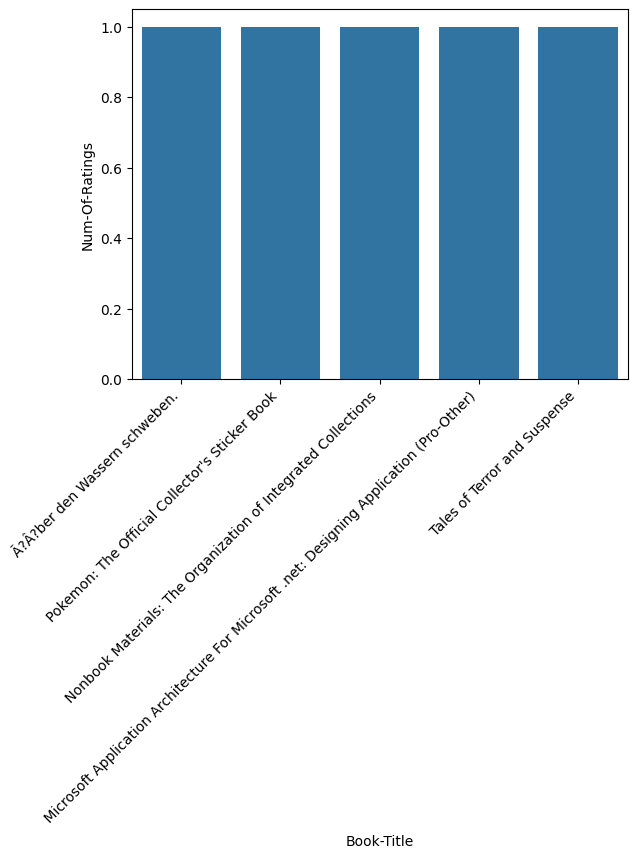

In [27]:
five_books_with_least_ratings = books_with_ratings.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=True).head(5).reset_index()
five_books_with_least_ratings.columns = ['Book-Title', 'Num-Of-Ratings']
sns.barplot(five_books_with_least_ratings, x='Book-Title', y='Num-Of-Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

There are also some books with very low number of ratings. Therefore, we can try finding books with more than a certain number of ratings.

## Recommendation with collaborative filtering

In [28]:
# Creates a series where each user is assigned a boolean of whether they have rated more than 50 books
x = books_with_ratings.groupby(['User-ID'])['Book-Rating'].count()>50

# x[x] will return only x that is True. Then, we get the index, which is the User-Id of user who rated more than 50 books
x_idx = x[x].index

# Then, we only get the user who has rated more than 50 books as the eligible users
eligible_users = books_with_ratings[books_with_ratings['User-ID'].isin(x_idx)]
eligible_users.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9


In [29]:
# From the eligible users, find books with more than 50 ratings (lower number of ratings can lead to bias)
y = eligible_users.groupby(['Book-Title'])['Book-Rating'].count() > 50

# y[y] will return only y that is True. Then, we get the index which is the Book-Title with more than 50 ratings
y_idx = y[y].index

# Then, we only get books with more than 50 ratings
filtered_df = eligible_users[eligible_users['Book-Title'].isin(y_idx)]
filtered_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0


In [30]:
# Create a pivot table of book ratings given by each user
books_pt = pd.pivot_table(data=filtered_df, columns='User-ID', index="Book-Title", values='Book-Rating')

# For NaN values, impute with 0
books_pt = books_pt.fillna(0)
books_pt

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Calculate similarities of each book with each other with cosine_similarity
books_similarity = cosine_similarity(books_pt)
books_similarity

array([[1.        , 0.04612255, 0.06374442, ..., 0.05526131, 0.03761358,
        0.02104474],
       [0.04612255, 1.        , 0.01695641, ..., 0.03826821, 0.12763956,
        0.09490141],
       [0.06374442, 0.01695641, 1.        , ..., 0.07303747, 0.        ,
        0.        ],
       ...,
       [0.05526131, 0.03826821, 0.07303747, ..., 1.        , 0.04144573,
        0.01093041],
       [0.03761358, 0.12763956, 0.        , ..., 0.04144573, 1.        ,
        0.06627547],
       [0.02104474, 0.09490141, 0.        , ..., 0.01093041, 0.06627547,
        1.        ]])

In [32]:
books_similarity.shape

(1329, 1329)

In [35]:
def recommended_books(book_name, number_of_recommendations):
  # Find the index of the book_name. np.where() returns a tuple, which is (array[book_index], )
  # By using the first indexer [0], we get only the array[book_index], then we use the second indexer [0] to get only the integer version of the book_index
  book_index = np.where(books_pt.index==book_name)[0][0]

  # Access the calculated similarities of the book by its index (use the index to find the book)
  similarities = books_similarity[book_index]

  # enumerate(similarities) will pair each similarities with its index. Then, list() will convert it into a list of tuples, example: [(0, 0.5), (1, 0.2), ...]
  # sorted() will sort based on the key. The key is to specify what to sort by. I use lambda x, which is an anonymous function that accept each tuple x and sort it by
  # the second element x[1], which is the similarity scores, and reverse=True specifies that it should be descending (highest to lowest).
  # [1:number_of_recommendations] is how many books should be recommended, starting from index 1 because index 0 will be the book itself.
  similar_books = sorted(list(enumerate(similarities)), key=lambda x:x[1], reverse=True)[1:number_of_recommendations+1]

  # Get the recommended book titles
  for book in similar_books:
    print(books_pt.index[book[0]])

In [36]:
recommended_books('1984', 5)

Animal Farm
Brave New World
American Psycho (Vintage Contemporaries)
The Vampire Lestat (Vampire Chronicles, Book II)
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death


In [37]:
recommended_books('Zoya', 3)

Jewels
Fine Things
Mixed Blessings
